## Study Case Project

### Problem understand the Influence of parents, background on students performance

**Questions**

* Does Gender affect math score
* Does parental education level impact student performance
* Do students who complete test preparation score higher



## Data Understanding

#### Data Source [kaggle]https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

**About Dataset**
This data set consists of the marks secured by the students in various subjects

### Features in dataset

* gender
* race/ethicity
* parental level of education
* lunch
* test preparation course
* math score
* reading score
* writing score

In cell below I import required libraries for data manipulation.

In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In cell below load the data for data manipulation using variable `student_df`

In [ ]:
# load dataset using pd alias

student_df = pd.read_csv('data/StudentsPerformance.csv')
student_df.head

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# perform metedata summary 

student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Above output shows student_df is dataframe type. It contains total of 8 records with `1000 entries`.
The dataset contains `5 objects datatypes` attributes and `3 int datatypes`.
No missing values

In [5]:
# statistical summary

student_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


The cell above shows statistical summary of all numeric attribute in student_df

#### For effective analysis I will break numeric and categorical attributes to perform data cleaning separately and later join them together.

`numeric_df` stores all numeric values and `categorical_df` stores categorical values

In [8]:
# numeric_df 

numeric_df = student_df.select_dtypes(include=[np.number]).columns
numeric_df

Index(['math score', 'reading score', 'writing score'], dtype='object')

The above cell selects all numeric columns from student_df and stores them in numeric-df

In [9]:
# check for missing values

(student_df[numeric_df].isna().sum() / len(student_df[numeric_df]))*100

math score       0.0
reading score    0.0
writing score    0.0
dtype: float64

In above cell I calculate the percent  of all missing values in numeric_df but the there is none

In [10]:
# check for duplicates

student_df[numeric_df].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

Above cell checks for duplicates values in numeric_df but there are none

### Prepare & Clean the categorical values

In [12]:
# select categorical attributes

categorical_df = student_df.select_dtypes(include = ['object']).columns
categorical_df

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

The above cell selects all categorical attributes from student_df

In [13]:
# check for missing values

(student_df[categorical_df].isna().sum() / len(student_df[categorical_df]))*100

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
dtype: float64

No empty values in categorical attributes

In [14]:
# check for duplicates

student_df[categorical_df].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996     True
997     True
998     True
999     True
Length: 1000, dtype: bool

shows categorical_df contains sum duplicates

In [16]:
# check for unique values
student_df[categorical_df].value_counts().sum()

np.int64(1000)

In [ ]:
# check for shape of the student-df
student_df.shape

(1000, 8)

the shape returns number of records and attributes

## Perform Data Analysis & formulate hypothesis


1. **Does gender affect math score**


In [36]:
gender_math = student_df.groupby(['gender'])['math score'].mean().reset_index()
gender_math

,gender,math score
0,female,63.633205
1,male,68.728216


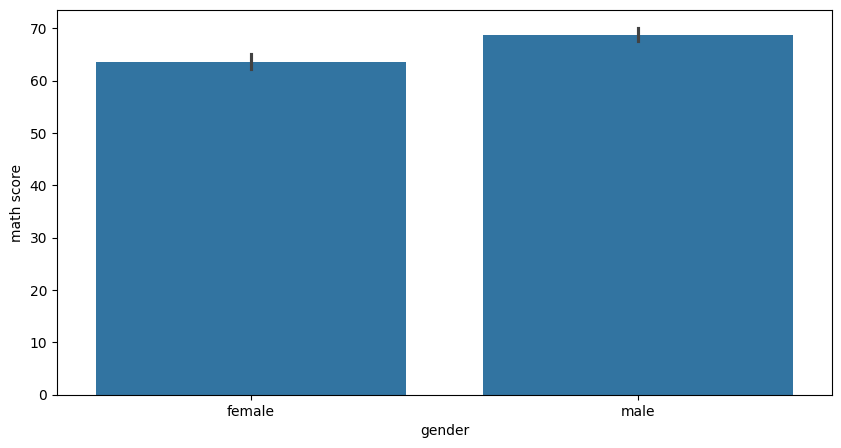

In [43]:
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(data=gender_math, x=student_df['gender'], y=student_df['math score'], ax=ax)
plt.show()

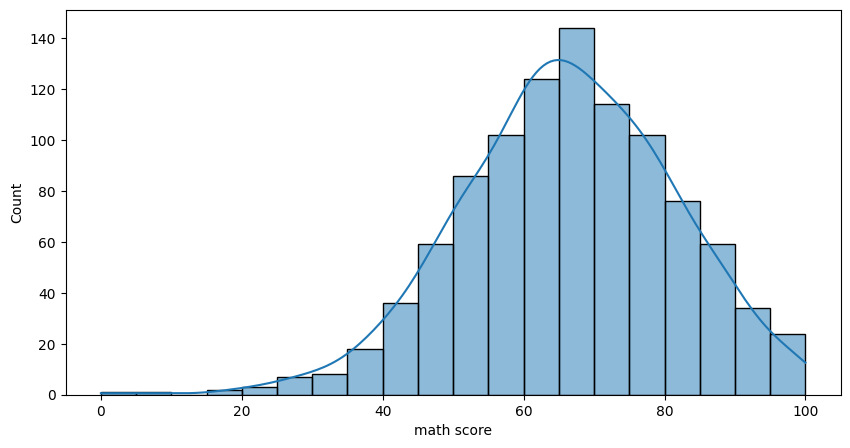

In [38]:
# compare how mathscore is distributed

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=student_df, x='math score', bins=20, kde=True, ax=ax)
plt.show()

2. **Does parental education level affect student perfomance**

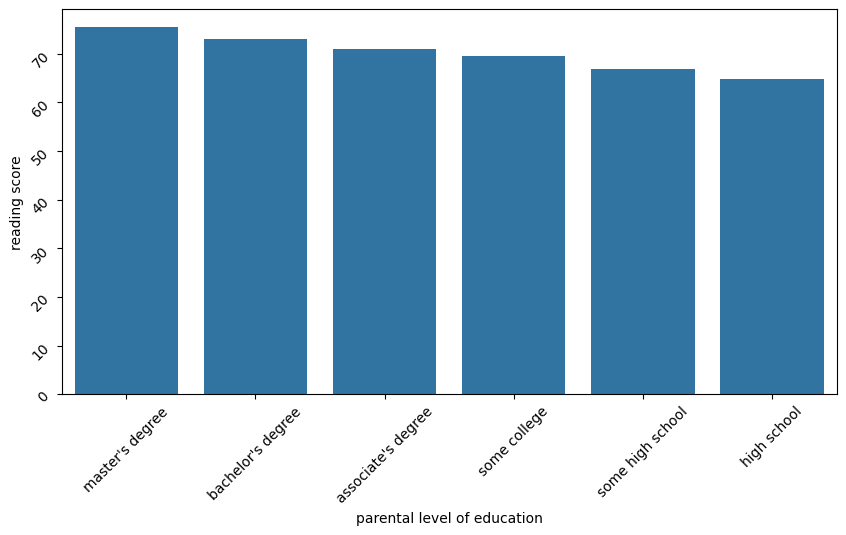

In [45]:
performance = student_df.groupby('parental level of education').agg({
    'math score' : 'mean',
    'reading score' : 'mean',
    'writing score' :'mean'

}
   
    
).reset_index()

# Sort values by reading score in descending order

performance = performance.sort_values(by ='reading score', ascending=False)


fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=performance, x='parental level of education', y='reading score', ax=ax)
ax.tick_params(rotation=45)
plt.show()

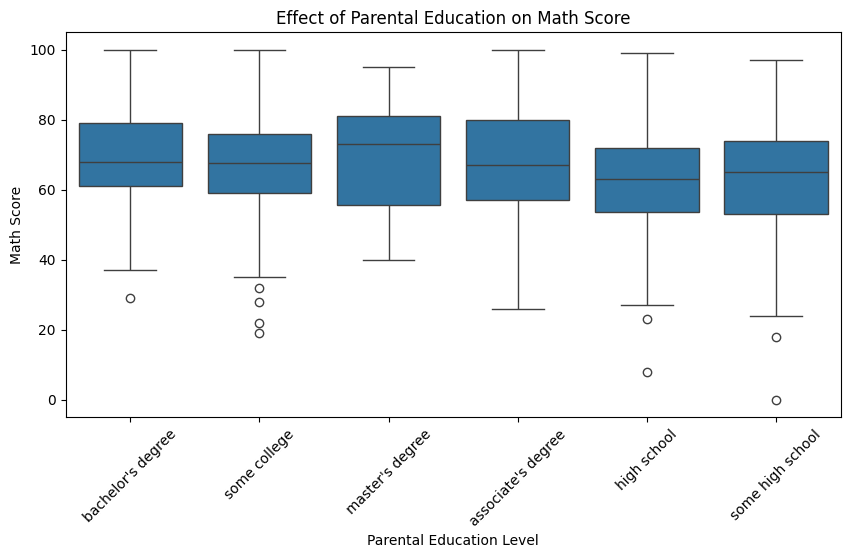

In [47]:


# Set figure size
fig, ax = plt.subplots(figsize=(10, 5))

# Create a box plot to show distribution of scores
sns.boxplot(data=student_df, x='parental level of education', y='math score', ax=ax)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels
ax.set_title("Effect of Parental Education on Math Score")
ax.set_xlabel("Parental Education Level")
ax.set_ylabel("Math Score")

# Show plot
plt.show()


3. Do student who complete test preparation score higher

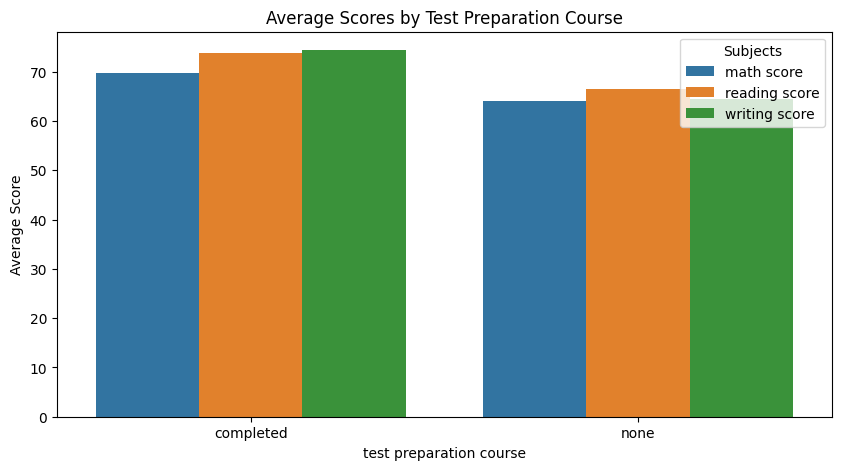

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Aggregate mean scores by test preparation course
test = student_df.groupby('test preparation course').agg({
    'math score': 'mean',
    'reading score': 'mean',
    'writing score': 'mean'
}).reset_index()

# Convert DataFrame to long format
test_long = test.melt(id_vars='test preparation course', 
                      var_name='Subject', 
                      value_name='Average Score')

# Plot all subjects in one bar plot
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=test_long, x='test preparation course', y='Average Score', hue='Subject', ax=ax)

# Improve readability
ax.set_title("Average Scores by Test Preparation Course")
plt.legend(title="Subjects")
plt.show()


hypothesis : student who complete test are more likely to perform higher
✅ Students who completed the test preparation course have higher average scores across all subjects (math, reading, and writing).
✅ The math score gap between the two groups is not as large as in reading and writing.
✅ The largest difference is in reading and writing scores, where those who completed the course outperform those who didn't.